In [5]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [6]:
# Carregar os dados dos arquivos CSV
df_dolar = pd.read_csv('../Arquivos/dolar-2023-03-21.csv')
df_euro = pd.read_csv('../Arquivos/euro.csv')

In [7]:
# Converter a coluna de data para o tipo datetime e definir como índice
df_dolar['Data'] = pd.to_datetime(df_dolar['Data'])
df_euro['Data'] = pd.to_datetime(df_euro['Data'])
df_dolar.set_index('Data', inplace=True)
df_euro.set_index('Data', inplace=True)

In [8]:
# Calcular o Z-score para cada ativo
df_dolar['Z-score'] = zscore(df_dolar['Valor'])
df_euro['Z-score'] = zscore(df_euro['Valor'])

# Definir um limiar para identificar as anomalias
limiar = 2

# Identificar as anomalias
anomalias_dolar = df_dolar[abs(df_dolar['Z-score']) > limiar]
anomalias_euro = df_euro[abs(df_euro['Z-score']) > limiar]

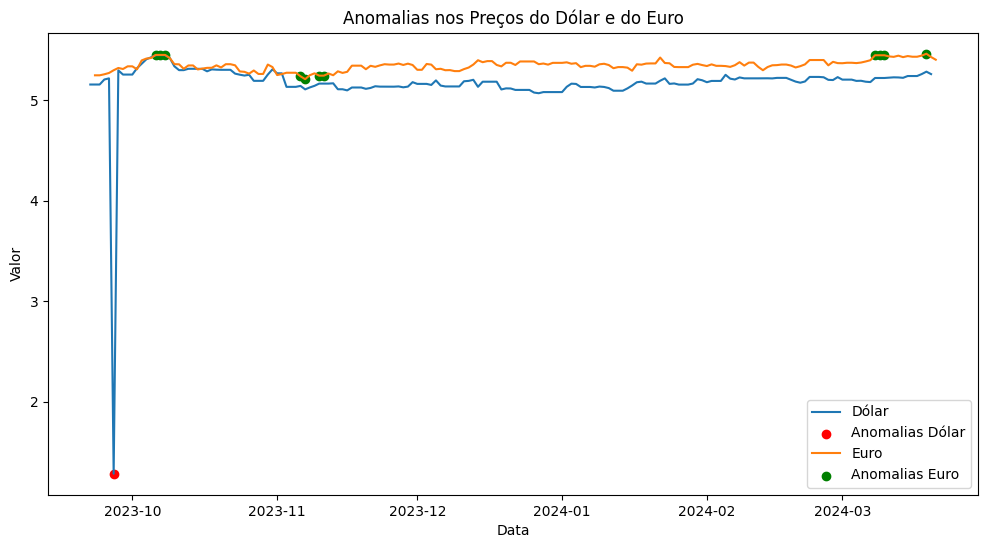

In [9]:
# Plotar os preços e destacar as anomalias
plt.figure(figsize=(12, 6))

plt.plot(df_dolar.index, df_dolar['Valor'], label='Dólar')
plt.scatter(anomalias_dolar.index, anomalias_dolar['Valor'], color='red', label='Anomalias Dólar')

plt.plot(df_euro.index, df_euro['Valor'], label='Euro')
plt.scatter(anomalias_euro.index, anomalias_euro['Valor'], color='green', label='Anomalias Euro')

plt.legend()
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Anomalias nos Preços do Dólar e do Euro')
plt.show()
